In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [200]:
data=pd.read_csv("Employee_attrition.csv")

In [201]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [202]:
# Attrition is our target variable, we will have NO=0,Yes=1
data.Attrition=data.Attrition.astype("category").cat.reorder_categories(["No","Yes"]).cat.codes  

In [203]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int8
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome           

In [205]:
data_object=data.select_dtypes(include="object")

In [206]:
for i in data_object.columns:
    j=data_object[i].value_counts(dropna=False)
    h=len(data_object[i].unique())
    print(i,"_____", h,"\n",j,"\n","\n")
    print("--------------------")

BusinessTravel _____ 3 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 
 

--------------------
Department _____ 3 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
 

--------------------
EducationField _____ 6 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
 

--------------------
Gender _____ 2 
 Male      882
Female    588
Name: Gender, dtype: int64 
 

--------------------
JobRole _____ 9 
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 


In [207]:
#as Over18 has only 1 unique value we can get rid of it
data_object=data_object.drop("Over18",axis=1)

In [208]:
data_object.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [209]:
data_object.BusinessTravel=data_object.BusinessTravel.astype("category").cat.reorder_categories(['Non-Travel',"Travel_Rarely","Travel_Frequently"]).cat.codes

In [210]:
data_object.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,2,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,1,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,2,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,1,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [211]:
data_object.OverTime=data_object.OverTime.astype("category").cat.reorder_categories(["No","Yes"]).cat.codes

In [212]:
dummies=pd.get_dummies(data_object[["Department","EducationField","Gender","JobRole","MaritalStatus"]],drop_first=True)

In [213]:
data_object=data_object.drop(["Department","EducationField","Gender","JobRole","MaritalStatus"],axis=1)

In [214]:
data_object=data_object.join(dummies)

In [215]:
data_object.head()

,BusinessTravel,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [216]:
data_numeric=data.select_dtypes(exclude="object")

In [217]:
data_numeric.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [218]:
data_numeric.var()==0

Age                         False
Attrition                   False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [219]:
# we check once more for this variable as I do not know why there was some problem when checking for all
data_numeric.EmployeeCount.var()==0

True

In [220]:
#we should drop StandardHours and EmployeeCount as variance is 0 and we have 1 unique value
data_numeric=data_numeric.drop(["StandardHours","EmployeeCount"],axis=1)

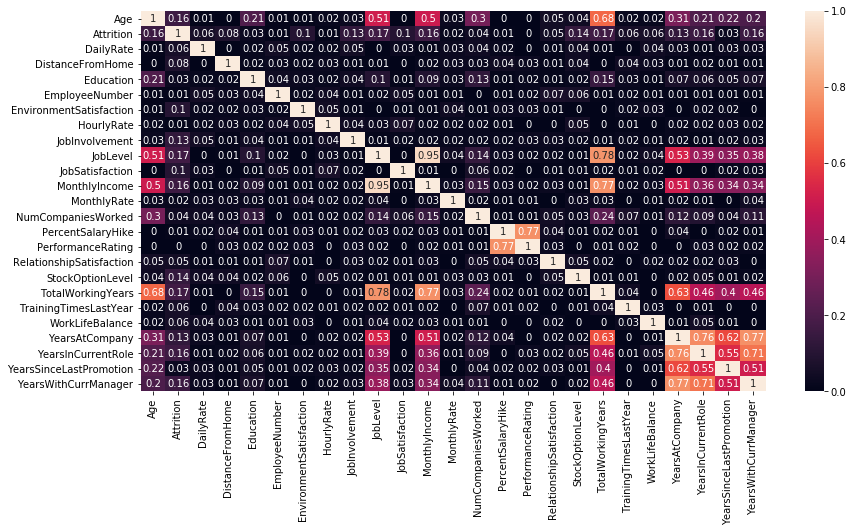

In [221]:
plt.figure(figsize=(14,7))         #some of them are very correlated
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)
plt.show()

In [222]:
#dropping one of highly correlated variables ( >75%)
data_numeric=data_numeric.drop(["MonthlyIncome","JobLevel","YearsAtCompany","PercentSalaryHike"],axis=1)

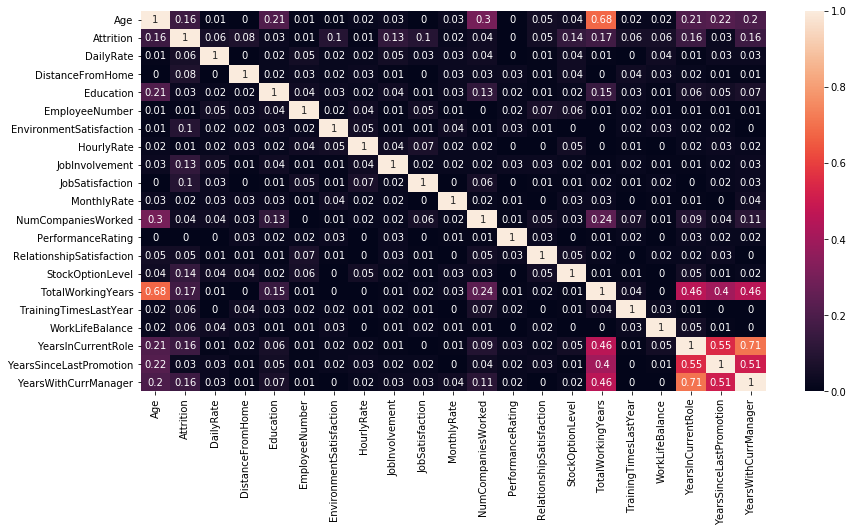

In [223]:
plt.figure(figsize=(14,7))         
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)
plt.show()

In [224]:
data_new=data_numeric.join(data_object,how='outer')

In [225]:
data_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,94,3,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,92,2,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,56,3,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,40,3,2,...,0,1,0,0,0,0,0,0,1,0


In [226]:
data_new.info()  #we can see here that we have no NAs, there is no need to check once more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int8
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    14

# Logistic Regression

In [227]:
data_new.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel', 'OverTime',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'Mar

In [339]:
data_new.columns=['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel', 'OverTime',
       'Department_ResearchDevelopment', 'Department_Sales',
       'EducationField_LifeSciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_TechnicalDegree', 'Gender_Male',
       'JobRole_HumanResources', 'JobRole_LaboratoryTechnician',
       'JobRole_Manager', 'JobRole_ManufacturingDirector',
       'JobRole_ResearchDirector', 'JobRole_ResearchScientist',
       'JobRole_SalesExecutive', 'JobRole_SalesRepresentative',
       'MaritalStatus_Married', 'MaritalStatus_Single']

In [340]:
X=data_new.drop("Attrition",axis=1)
Y=data_new.Attrition 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [341]:
#83.88 % of employees have not churned
#This means that without any model the accuracy of our prediction that employees will stay will be almost 84 %
#84% is like a benchmark
data_new.Attrition.value_counts()/len(data_new)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [342]:
formula="Attrition~"+"+".join(X.columns.tolist())
formula

'Attrition~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyRate+NumCompaniesWorked+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel+OverTime+Department_ResearchDevelopment+Department_Sales+EducationField_LifeSciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_TechnicalDegree+Gender_Male+JobRole_HumanResources+JobRole_LaboratoryTechnician+JobRole_Manager+JobRole_ManufacturingDirector+JobRole_ResearchDirector+JobRole_ResearchScientist+JobRole_SalesExecutive+JobRole_SalesRepresentative+MaritalStatus_Married+MaritalStatus_Single'

In [343]:
model_logit=Logit.from_formula(formula=formula, data=data_new)
results=model_logit.fit()

         Current function value: inf
         Iterations: 35


C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [344]:
results.summary()

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           40
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                    -inf
Time:                        20:18:11   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.374e+07        nan        nan        nan         nan         nan
Age                               -0.0495      0.015     -3.322      0.001      -0.079      -0.020
DailyRate                         -0.0004      0.000     -1.547      0.122      -0.001    9.83e-05
DistanceFromHome                   0.0451      0.012      3.884      0.000       0.022       0.068
Education                         -0.0409      0.095     -0.431      0.666      -0.227       0.145
EmployeeNumber                    -0.0003      0.000     -1.664      0.096      -0.001    4.86e-05
EnvironmentSatisfaction           -0.6034      0.092     -6.569      0.000      -0.783      -0.423
HourlyRate                         0.0021      0.005      0.438      0.662      -0.007       0.011
JobInvolvement                    -0.8155      0.137     -5.973      0.000      -1.083      -0.548
JobSatisfaction                   -0.5554      0.089     -6.241      0.000      -0.730      -0.381
MonthlyRate                    -3.802e-06   1.36e-05     -0.280      0.779   -3.04e-05    2.28e-05
NumCompaniesWorked                 0.2353      0.042      5.622      0.000       0.153       0.317
PerformanceRating                 -0.7610      0.295     -2.580      0.010      -1.339      -0.183
RelationshipSatisfaction          -0.3245      0.089     -3.639      0.000      -0.499      -0.150
StockOptionLevel                  -0.3749      0.173     -2.162      0.031      -0.715      -0.035
TotalWorkingYears                 -0.0870      0.028     -3.142      0.002      -0.141      -0.033
TrainingTimesLastYear             -0.2570      0.079     -3.252      0.001      -0.412      -0.102
WorkLifeBalance                   -0.6416      0.136     -4.715      0.000      -0.908      -0.375
YearsInCurrentRole                -0.0957      0.046     -2.063      0.039      -0.187      -0.005
YearsSinceLastPromotion            0.2978      0.047      6.328      0.000       0.206       0.390
YearsWithCurrManager              -0.1045      0.048     -2.173      0.030      -0.199      -0.010
BusinessTravel                     1.0668      0.191      5.597      0.000       0.693       1.440
OverTime                           2.3452      0.220     10.661      0.000       1.914       2.776
Department_ResearchDevelopment -5.374e+07        nan        nan        nan         nan         nan
Department_Sales               -6.327e+07        nan        nan        nan         nan         nan
EducationField_LifeSciences        1.4426      0.984      1.466      0.143      -0.487       3.372
EducationField_Marketing           1.9825      1.029      1.927      0.054      -0.033       3.998
EducationField_Medical             1.3680      0.980      1.395      0.163      -0.553       3.289
EducationField_Other               1.3111      1.043      1.258      0.209      -0.732       3.354
EducationField_TechnicalDegree     2.5624      1.003      2.554      0.01

interpreting some variables(if P-value is more than 0.05 no need to interpret,other are the significant features)

1.As we can see from summary the p_value of "EnvironmentSatisfaction" is too small so we can state that there is a statistically significant relationship betwwen "EnvironmentSatisfaction" and "Attrition". The coeffitient is -0.6, it is negative,so it means that the increase in emvironment satisfaction will lead to a decrease  the probability of Attrition.

2.for Marital_status_single  we can see that p_value=0.014<0.05, so in 95% confidence it is a significant variable, as the coefficinet is >0 we can state that the probability of churn of single employees is higher compared to divorced. 

3. For  BusinessTravel the p_value is too small so we can state that there is a statistically significant relationship between "BusinesTravel" and "Attrition". The coeffitient is positive , so it means that the probability of Attrition for those who  travel more frequently will be higher.

In [345]:
logit_sk=LogisticRegression()

In [346]:
logit_sk=logit_sk.fit(X_train,Y_train)

In [347]:
#the model Accuracy,which means that in 89% cases we are accurate in our the prediction on the test set.
logit_sk.score(X_test,Y_test)

0.8913043478260869

# Decision Tree

In [348]:
model_tree1=DecisionTreeClassifier(random_state=42) 
model_tree1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [349]:
model_tree1.score(X_train,Y_train)

1.0

In [350]:
model_tree1.score(X_test,Y_test)

0.7771739130434783

In [406]:
#trying to cut the tree randomly choosing hyper parameters
model_tree=DecisionTreeClassifier(max_depth=5,min_samples_leaf=100,random_state=42) 
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [407]:
model_tree.score(X_train,Y_train)

0.8366606170598911

In [408]:
#accuracy raised after cutting ,buut
# the train score is lower than the test set scores ,that is because of not good chosen parameters, we should do Gridsearch to see
model_tree.score(X_test,Y_test)

0.842391304347826

In [409]:
importances=model_tree.feature_importances_

In [410]:
imp=pd.DataFrame(data=importances,index=X.columns,columns=["imp"])

In [411]:
imp

,imp
Age,0.000000
DailyRate,0.000705
DistanceFromHome,0.000000
Education,0.000000
EmployeeNumber,0.009457
EnvironmentSatisfaction,0.000000
HourlyRate,0.000000
JobInvolvement,0.000000
JobSatisfaction,0.000000
MonthlyRate,0.000000


The importances for for example  Overtime is almost 0.41 which shows the proportion of gini index which was deacresed by that variable.The most important features are overtime,total working years,stock option level.

In [357]:
tree_gr2=export_graphviz(model_tree,out_file="tree2.dot", class_names=True, feature_names=X.columns, filled=True) 

The accuracy of Logistic regression model is 89%,the one of decision tree is 84% . in this terms we can state that Logistic regression is preferable, but we should take into account that accuracy is not in reality enough to make a decision.
